<h1 style="background-color:#ff5200;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table Of Content</h1>



[1. Libraries And Utilities](#1)

[2 Dataset & Preprocessing](#2)

[3 Pearson's Correlation Coefficient](#3)

- [3.1 Plasma](#3.1)
- [3.2 Serum](#3.2)
    
[4 PCA & t-SNE](#4)

[5 Lazypredict](#5)

[6. Prediction](#6)

[7. Visualization](#7)


<a id="1"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h1>

[Download DATASETS from here](https://github.com/utshabkg/LungCancer_Biomarker/tree/main/dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

from sklearn.model_selection import ShuffleSplit, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from scipy import stats

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV
from yellowbrick.model_selection import FeatureImportances

C:\Users\UTSHAB\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


<a id="2"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Dataset & Preprocessing</h1>

[Download DATASETS from here](https://github.com/utshabkg/LungCancer_Biomarker/tree/main/dataset)

In [2]:
plasma = pd.read_csv('G:\Research\SM Sir\LungCancer_Biomarker\dataset\plasma_processed.csv')
serum = pd.read_csv('G:\Research\SM Sir\LungCancer_Biomarker\dataset\serum_processed.csv')
plasma.rename(columns = {'tocopherol alpha-': 'alpha-tocopherol', 'tocopherol gamma-': 'gamma-tocopherol'}, inplace = True)
serum.rename(columns = {'tocopherol alpha-': 'alpha-tocopherol', 'tocopherol gamma-': 'gamma-tocopherol'}, inplace = True)
plasma0 = plasma.drop(['Unnamed: 0'], axis=1)
serum0 = serum.drop(['Unnamed: 0'], axis=1)
serum0

,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,...,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,9582,279,82,61,357,122,24944,56,32,966,...,34239,54924,43,226295,11606,68,153849,194,811,disease
1,28847,161,78,84,205,258,10680,104,49,1076,...,20080,37597,203,96226,10188,71,110735,294,910,disease
2,13627,162,53,133,139,159,27201,160,80,1117,...,29191,28707,211,155596,16617,123,95509,253,804,disease
3,20758,6671,93,78,335,225,32347,242,59,304,...,16637,27873,71,191671,15214,84,96219,157,806,disease
4,15692,108,98,69,250,120,18357,60,25,1220,...,29820,30132,200,333019,20281,62,159853,188,1226,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,25194,108,106,32,127,185,23821,53,103,1334,...,34521,35970,92,262448,18757,54,108092,180,748,control
78,23525,83,140,261,167,181,12396,65,39,1408,...,28112,28014,104,310051,26134,50,134469,211,651,control
79,25154,418,90,307,284,100,11788,124,106,997,...,39591,37287,166,295930,21733,69,82547,457,749,control
80,12397,110,104,56,342,186,15214,47,129,924,...,29273,23742,1903,276190,17275,68,112921,1256,526,control


In [3]:
# standardize
for i in ['plasma', 'serum']:
    scl = StandardScaler().fit(vars()[i+'0'].iloc[:, :-1])
    stand = scl.transform(vars()[i+'0'].iloc[:, :-1])
    vars()[i] = pd.DataFrame(stand, columns = vars()[i+'0'].columns[:-1])
    vars()[i] = pd.concat([vars()[i], vars()[i+'0'].iloc[:, -1]], axis=1)

plasma.head()

,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,...,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,-1.32,-0.19,-0.31,0.90,0.21,-0.67,0.73,-0.14,-0.40,-0.06,...,0.52,1.94,-0.42,0.38,-1.02,-0.69,1.88,-0.53,0.63,disease
1,0.70,-0.17,1.11,-0.83,-0.53,-0.19,-0.95,-0.22,-0.17,-1.30,...,-0.90,0.31,-0.18,-0.53,-1.24,0.99,-0.34,-0.08,-0.25,disease
2,-0.81,-0.20,-0.92,-1.27,-0.88,-1.01,1.01,-0.20,-0.14,0.02,...,0.83,-0.38,-0.03,-1.03,-0.23,1.02,-0.80,-0.27,-0.88,disease
3,-0.20,-0.17,-0.24,-0.47,-0.34,-0.37,1.93,-0.16,-0.16,-1.02,...,-1.11,-0.71,-0.42,-0.48,-0.48,0.50,-0.58,-0.35,-0.62,disease
4,-0.45,-0.15,-0.26,0.94,-0.14,0.10,0.17,-0.23,-0.37,0.19,...,0.01,-0.44,0.00,0.38,0.76,-0.85,1.97,-0.44,1.90,disease


In [4]:
plasma.dtypes

1_5-anhydroglucitol                float64
1-monostearin                      float64
2_3-dihydroxybutanoic acid NIST    float64
2_4-diaminobutyric acid            float64
2-deoxyerythritol                  float64
                                    ...   
uridine                            float64
valine                             float64
xylitol                            float64
xylose                             float64
Class                               object
Length: 159, dtype: object

<a id="3"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Pearson's Correlation Coefficient
</h1>

<a id="3.1"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:180%;text-align:center;border-radius: 15px 50px;">Plasma
</h1>


In [5]:
pearson_p = []
for i in plasma.columns:
    if plasma[i].dtypes!='O':
        pearson_coef, p_value = stats.pearsonr(plasma[i], plasma['Class'].map({"control": 0, "disease": 1}))
        pearson_p.append([i, pearson_coef, p_value])
pearson_p_df = pd.DataFrame(pearson_p, columns=['Features', 'Pearson Coefficient', 'p-Value'])
pearson_p_df

,Features,Pearson Coefficient,p-Value
0,1_5-anhydroglucitol,-0.05,0.65
1,1-monostearin,0.18,0.11
2,2_3-dihydroxybutanoic acid NIST,0.08,0.49
3,2_4-diaminobutyric acid,0.08,0.50
4,2-deoxyerythritol,0.06,0.59
...,...,...,...
153,uric acid,-0.31,0.00
154,uridine,-0.00,0.99
155,valine,-0.09,0.40
156,xylitol,-0.07,0.54


In [6]:
import math
pearson_p_final = []
for i in range(158):
    if pearson_p_df.loc[i, 'p-Value'] < 0.05:
        pearson_p_final.append(pearson_p_df.loc[i, 'Features'])
len(pearson_p_final)

38

In [7]:
pearson = pearson_p_df[pearson_p_df['p-Value'] < 0.05]
pearson

,Features,Pearson Coefficient,p-Value
14,3-hydroxybutanoic acid,-0.22,0.05
16,3-phosphoglycerate,0.39,0.00
17,5-hydroxynorvaline NIST,-0.28,0.01
18,5-methoxytryptamine,0.54,0.00
21,adenosine-5-monophosphate,0.58,0.00
24,alpha-ketoglutarate,0.29,0.01
29,asparagine,-0.36,0.00
30,aspartic acid,0.44,0.00
33,benzoic acid,-0.34,0.00
34,beta-alanine,0.26,0.02


In [8]:
# pearson.to_latex('output.tex')

In [9]:
r_metabolites = pearson_p_df[(pearson_p_df['p-Value'] > 0.05)]
# r_metabolites.to_latex('output_removed.tex')
# r_metabolites.to_csv('output_removed.csv', index=False)

<a id="3.2"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:180%;text-align:center;border-radius: 15px 50px;">Serum
</h1>


In [10]:
pearson_p_serum = []
for i in serum.columns:
    if serum[i].dtypes!='O':
        pearson_coef, p_value = stats.pearsonr(serum[i], serum['Class'].map({"control": 0, "disease": 1}))
        pearson_p_serum.append([i, pearson_coef, p_value])
pearson_p_df_serum = pd.DataFrame(pearson_p_serum, columns=['Features', 'Pearson Coefficient', 'p-Value'])
pearson_p_df_serum

,Features,Pearson Coefficient,p-Value
0,1_5-anhydroglucitol,-0.07,0.50
1,1-monostearin,-0.05,0.67
2,2_3-dihydroxybutanoic acid NIST,-0.18,0.11
3,2_4-diaminobutyric acid,-0.14,0.21
4,2-deoxyerythritol,0.02,0.88
...,...,...,...
153,uric acid,-0.28,0.01
154,uridine,0.07,0.52
155,valine,-0.10,0.39
156,xylitol,-0.13,0.24


In [11]:
pearson_p_final_serum = []
for i in range(158):
    if pearson_p_df_serum.loc[i, 'p-Value'] < 0.05:
        pearson_p_final_serum.append(pearson_p_df_serum.loc[i, 'Features'])
len(pearson_p_final_serum)

28

In [12]:
pearson2 = pearson_p_df_serum[pearson_p_df_serum['p-Value'] < 0.05]
# pearson2.to_latex('output2.tex')

In [13]:
r_metabolites = pearson_p_df_serum[(pearson_p_df_serum['p-Value'] > 0.05)]
# r_metabolites.to_latex('output_removed2.tex')
# r_metabolites.to_csv('output_removed2.csv', index=False)

<a id="4"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">PCA & t-SNE
</h1>

In [14]:
# necessary functions
labels = np.reshape(plasma['Class'].to_numpy(), (82,1))

def pca_analysis(df, n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.iloc[:, :-1].values)

    pca_concatenate = np.concatenate([pca_result, labels], axis=1)
    return pca_concatenate

def make_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'pc{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

def tsne_analysis(df, n_components):
    tsne = TSNE(n_components=n_components)
    tsne_result = tsne.fit_transform(df.iloc[:, :-1].values)

    tsne_concatenate = np.concatenate([tsne_result, labels], axis=1)
    return tsne_concatenate
def tsne_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'tsne{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

def get_xy(df):
  X = df.drop('Class', axis=1)
  X = X.apply(pd.to_numeric)
  y = df['Class'].copy()
  y = y.map({"control": 0, "disease": 1})
  return X, y

<a id="5"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Lazypredict
</h1>

In [15]:
imp0 = pearson_p_final
imp1 = pearson_p_final_serum

In [27]:
imp28 = ['3-phosphoglycerate', '5-hydroxynorvaline NIST', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'alpha-ketoglutarate', 'asparagine', 'aspartic acid', 'benzoic acid', 'citrulline', 'glutamine', 'hypoxanthine', 'inosine', 'lactamide', 'lactic acid', 'malic acid', 'maltose', 'maltotriose', 'methionine sulfoxide', 'nornicotine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'quinic acid', 'taurine', 'threonine', 'tryptophan', 'uric acid']
imp13 = ['5-hydroxynorvaline NIST', 'aspartic acid', 'cholesterol', 'deoxypentitol', 'glutamic acid', 'hypoxanthine', 'inosine', 'lactic acid', 'N-methylalanine', 'nornicotine', 'phenol', 'quinic acid', 'taurine']

In [17]:
model_names = ['ExtraTreeClassifier', 'DecisionTreeClassifier', 'XGBClassifier',
       'RandomForestClassifier', 'NearestCentroid', 'KNeighborsClassifier',
       'QuadraticDiscriminantAnalysis', 'LinearSVC', 'BaggingClassifier',
       'SGDClassifier', 'LogisticRegression', 'LGBMClassifier',
       'CalibratedClassifierCV', 'GaussianNB', 'BernoulliNB',
       'PassiveAggressiveClassifier', 'LabelSpreading', 'LabelPropagation',
       'ExtraTreesClassifier', 'Perceptron', 'LinearDiscriminantAnalysis',
       'RidgeClassifier', 'AdaBoostClassifier', 'NuSVC', 'SVC',
       'RidgeClassifierCV', 'DummyClassifier']

In [21]:
full_result = []
accuracy = []
for k in [0]:
    if k==0:
        name = ['Serum(Specific Metabolics)']
        dfs = [serum[imp13]]
    elif k==22 or k==23:
        name = [f'tsne{k-20}_plasma(Specific Metabolics)', f'tsne{k-20}_serum(Specific Metabolics)']
        dfs = [vars()[f'tsne{k-20}_plasma_df'], vars()[f'tsne{k-20}_serum_df']]
    else:
        if k>10:
            name = [f'pca{k}_plasma(Specific Metabolics)']
            dfs = [vars()[f'pca{k}_plasma_df']]
        else:
            name = [f'pca{k}_plasma(Specific Metabolics)', f'pca{k}_serum(Specific Metabolics)']
            dfs = [vars()[f'pca{k}_plasma_df'], vars()[f'pca{k}_serum_df']]
    
    random_state = 42

    for idx, data in enumerate(dfs):
      result = []
      if data.columns[-1]=='Class':
            X = data.drop('Class', axis=1)
      else:
        X = data
        y = plasma['Class'].copy()
        y = y.map({"control": 0, "disease": 1})
        rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)
      
      for train_index, test_index in rs.split(X):
        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        models, predictions = clf.fit(X_train, X_test, y_train, y_test)
        result.append(models)

      acc = []
      for i in range(1):
        acc.append(result[i].iloc[0]['Balanced Accuracy'])

#       print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
#       accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])
        
      full_result.append(result)

100%|██████████| 29/29 [00:00<00:00, 52.04it/s]


In [22]:
model_topper = {}
for i in model_names:
    vars()[i] = [0, 0.0]
    model_topper[i] = vars()[i]
for i in range(1):
    for j in range(len(model_names)):
        if full_result[0][i].index[0] == model_names[j]:
            vars()[model_names[j]][0] += 1
        vars()[model_names[j]][1] += full_result[0][i].loc[model_names[j]]['Balanced Accuracy']
        model_topper[model_names[j]] = vars()[model_names[j]]

model_topper

{'AdaBoostClassifier': [0, 0.7803030303030303],
 'BaggingClassifier': [0, 0.8181818181818181],
 'BernoulliNB': [0, 0.7424242424242424],
 'CalibratedClassifierCV': [0, 0.8181818181818181],
 'DecisionTreeClassifier': [0, 0.8712121212121212],
 'DummyClassifier': [0, 0.606060606060606],
 'ExtraTreeClassifier': [0, 0.5681818181818181],
 'ExtraTreesClassifier': [0, 0.8257575757575758],
 'GaussianNB': [0, 0.7348484848484849],
 'KNeighborsClassifier': [0, 0.8181818181818181],
 'LGBMClassifier': [0, 0.7424242424242424],
 'LabelPropagation': [0, 0.8712121212121212],
 'LabelSpreading': [0, 0.8712121212121212],
 'LinearDiscriminantAnalysis': [0, 0.6893939393939394],
 'LinearSVC': [0, 0.8181818181818181],
 'LogisticRegression': [0, 0.6515151515151515],
 'NearestCentroid': [0, 0.7348484848484849],
 'NuSVC': [0, 0.8636363636363636],
 'PassiveAggressiveClassifier': [0, 0.7803030303030303],
 'Perceptron': [0, 0.7424242424242424],
 'QuadraticDiscriminantAnalysis': [0, 0.696969696969697],
 'RandomForestC

<a id="6"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Prediction
</h1>

In [32]:
accuracy = []
for k in [0, 2, 3, 4, 5, 10, 15, 20, 22, 23]:
    
    if k==0:
        name = ['Plasma(Raw)', 'Serum(Raw)', 'Plasma(Exploratory)', 'Serum(Exploratory)']
        dfs = [plasma[imp28], serum[imp13]]
    
    elif k==22 or k==23:
        k -= 20
        name = [f'tsne{k}_plasma(Exploratory)', f'tsne{k}_serum(Exploratory)']
        vars()[f'tsne{k}_plasma'] = tsne_analysis(plasma[imp28], k)
        vars()[f'tsne{k}_plasma_df'] = make_dataframe(vars()[f'tsne{k}_plasma'], k)
        
        vars()[f'tsne{k}_serum'] = tsne_analysis(serum[imp13], k)
        vars()[f'tsne{k}_serum_df'] = make_dataframe(vars()[f'tsne{k}_serum'], k)
        
        dfs = [vars()[f'tsne{k}_plasma_df'], vars()[f'tsne{k}_serum_df']]
    
    else:
        if k <= 10:
            name = [f'pca{k}_plasma(Exploratory)', f'pca{k}_serum(Exploratory)']
            vars()[f'pca{k}_plasma'] = pca_analysis(plasma[imp28], k)
            vars()[f'pca{k}_plasma_df'] = make_dataframe(vars()[f'pca{k}_plasma'], k)

            vars()[f'pca{k}_serum'] = pca_analysis(serum[imp13], k)
            vars()[f'pca{k}_serum_df'] = make_dataframe(vars()[f'pca{k}_serum'], k)

            dfs = [vars()[f'pca{k}_plasma_df'], vars()[f'pca{k}_serum_df']]
        else:
            name = [f'pca{k}_plasma(Exploratory)']
            vars()[f'pca{k}_plasma'] = pca_analysis(plasma[imp28], k)
            vars()[f'pca{k}_plasma_df'] = make_dataframe(vars()[f'pca{k}_plasma'], k)

            dfs = [vars()[f'pca{k}_plasma_df']]
    
    random_state = 42

    for idx, data in enumerate(dfs):
        result = []
        if data.columns[-1]=='Class':
            X = data.drop('Class', axis=1)
        else:
            X = data
        y = plasma['Class'].copy()
        y = y.map({"control": 0, "disease": 1})
        rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)

        for train_index, test_index in rs.split(X):
            clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            scaler = RobustScaler()

            cols = X_train.columns
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            X_train = pd.DataFrame(X_train, columns=[cols])
            X_test = pd.DataFrame(X_test, columns=[cols])

            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            result.append(models)
        #     print(result)

        acc = []
        for i in range(1):
            for j in range(len(model_names)):
                if result[i].index[j] == 'XGBClassifier':
                    acc.append(result[i].loc['XGBClassifier']['Balanced Accuracy'])
#                     print(result[i].index[j], result[i].iloc[j]['Balanced Accuracy'])

        print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
        accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])

  7%|▋         | 2/29 [00:00<00:01, 14.93it/s]


Plasma(Raw): 0.7878787878787878


  7%|▋         | 2/29 [00:00<00:01, 16.33it/s]


Serum(Raw): 0.9090909090909092


  7%|▋         | 2/29 [00:00<00:01, 16.66it/s]


pca2_plasma(Exploratory): 0.9545454545454546


  3%|▎         | 1/29 [00:00<00:02,  9.80it/s]


pca2_serum(Exploratory): 0.696969696969697


  7%|▋         | 2/29 [00:00<00:01, 16.61it/s]


pca3_plasma(Exploratory): 0.9545454545454546


  7%|▋         | 2/29 [00:00<00:01, 18.50it/s]


pca3_serum(Exploratory): 0.7878787878787878


  7%|▋         | 2/29 [00:00<00:01, 18.83it/s]


pca4_plasma(Exploratory): 0.9545454545454546


  7%|▋         | 2/29 [00:00<00:01, 18.53it/s]


pca4_serum(Exploratory): 0.6590909090909092


  7%|▋         | 2/29 [00:00<00:01, 17.48it/s]


pca5_plasma(Exploratory): 0.8712121212121212


  7%|▋         | 2/29 [00:00<00:01, 17.17it/s]


pca5_serum(Exploratory): 0.75


  7%|▋         | 2/29 [00:00<00:01, 17.72it/s]


pca10_plasma(Exploratory): 0.9090909090909092


  7%|▋         | 2/29 [00:00<00:01, 18.12it/s]


pca10_serum(Exploratory): 0.7424242424242424


  7%|▋         | 2/29 [00:00<00:01, 17.89it/s]


pca15_plasma(Exploratory): 0.9090909090909092


100%|██████████| 29/29 [00:00<00:00, 47.83it/s]



pca20_plasma(Exploratory): 0.8712121212121212


  7%|▋         | 2/29 [00:00<00:01, 16.39it/s]


tsne2_plasma(Exploratory): 0.8636363636363636


100%|██████████| 29/29 [00:00<00:00, 48.60it/s]



tsne2_serum(Exploratory): 0.8636363636363636


  7%|▋         | 2/29 [00:00<00:01, 17.32it/s]


tsne3_plasma(Exploratory): 0.7045454545454546


100%|██████████| 29/29 [00:00<00:00, 47.58it/s]


tsne3_serum(Exploratory): 0.606060606060606


In [33]:
accuracy_df = pd.DataFrame(accuracy, columns=['Processed Dataset', 'Accuracy'])
accuracy_df

,Processed Dataset,Accuracy
0,Plasma(Raw),0.7878787878787878
1,Serum(Raw),0.9090909090909092
2,pca2_plasma(Exploratory),0.9545454545454546
3,pca2_serum(Exploratory),0.696969696969697
4,pca3_plasma(Exploratory),0.9545454545454546
5,pca3_serum(Exploratory),0.7878787878787878
6,pca4_plasma(Exploratory),0.9545454545454546
7,pca4_serum(Exploratory),0.6590909090909092
8,pca5_plasma(Exploratory),0.8712121212121212
9,pca5_serum(Exploratory),0.75


In [21]:
# accuracy_df.to_csv('G:/Research/SM Sir/LungCancer_Biomarker/final and best approach/accuracy_2.csv', index=False)

<a id="7"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Visualization
</h1>

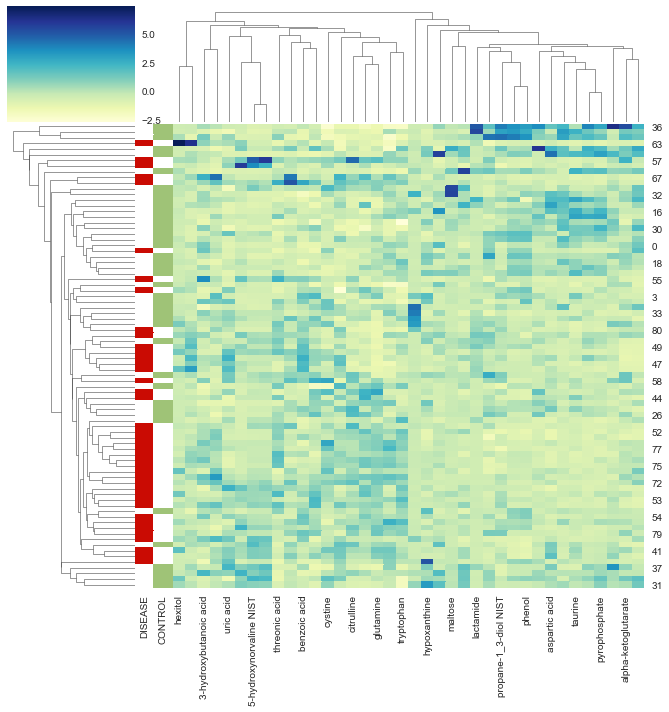

In [22]:
# Data set
final_df1 = plasma.copy()
Class = plasma.pop("Class")
# final_df = final_df.set_index('Metabolics')

lut = dict(zip(Class.unique(), "grb"))
row_colors = Class.map(lut)
df_colors = pd.DataFrame(data={'DISEASE': row_colors[row_colors == 'r'], 'CONTROL': row_colors[row_colors == 'g']}) 
# Default plot
g = sns.clustermap(plasma[imp0], cmap='YlGnBu', row_colors=df_colors, z_score=1)      #z_score->standardize; standard_cale->normalize
g.fig.subplots_adjust(right=0.9)
g.ax_cbar.set_position((0.7, .2, .03, .4), 'horizontal')
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
# Show the graph
# Show the graph
# plt.savefig('plotting/clustermap_exploratory_plasma.JPG')
plt.show()

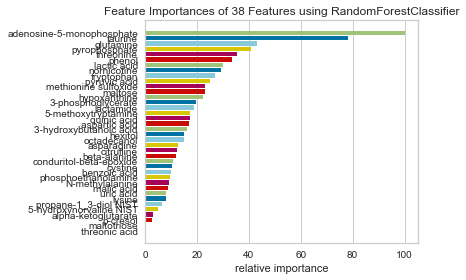

<AxesSubplot:title={'center':'Feature Importances of 38 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Load the classification data set
X = final_df1[imp0]
y = final_df1['Class'].copy()
y = y.map({"control": 1, "disease": 0})

model = RandomForestClassifier(n_estimators=17)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

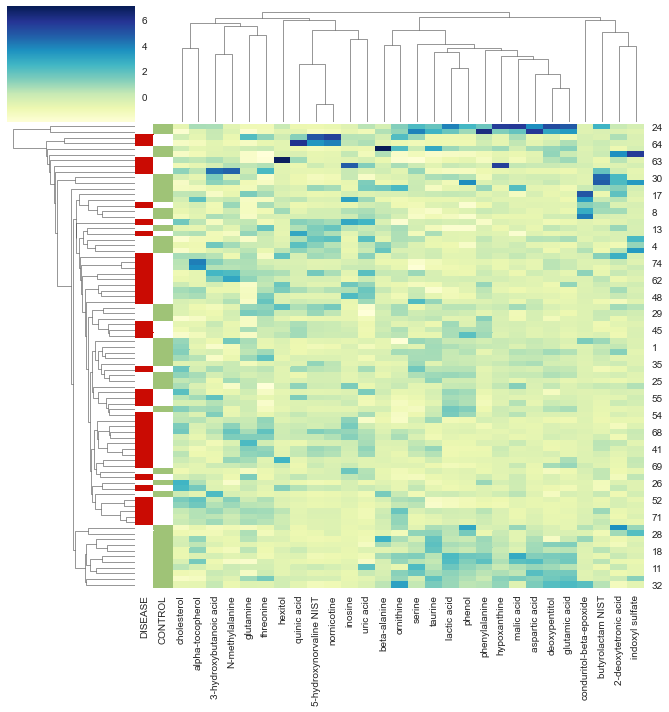

In [24]:
# Data set
final_df1 = serum.copy()
Class = y
# final_df = final_df.set_index('Metabolics')

lut = dict(zip(Class.unique(), "grb"))
row_colors = Class.map(lut)
df_colors = pd.DataFrame(data={'DISEASE': row_colors[row_colors == 'r'], 'CONTROL': row_colors[row_colors == 'g']}) 
# Default plot
g = sns.clustermap(serum[imp1], cmap='YlGnBu', row_colors=df_colors, z_score=1)      #z_score->standardize; standard_cale->normalize
g.fig.subplots_adjust(right=0.9)
g.ax_cbar.set_position((0.7, .2, .03, .4), 'horizontal')
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
# Show the graph
# Show the graph
# plt.savefig('plotting/clustermap_exploratory_serum.JPG')
plt.show()

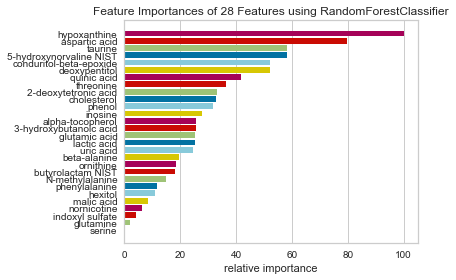

<AxesSubplot:title={'center':'Feature Importances of 28 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [25]:
# Load the classification data set
X = final_df1[imp1]
# y = final_df1['Class'].copy()
y = Class
model = RandomForestClassifier(n_estimators=17)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()